# Week 1 Ingesting and Exploring the Dataset

In [1]:
# install wordcloud
!pip install wordcloud

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
# change working directory
import os
os.getcwd()  # Get current working directory
os.chdir('..')  # Move up one directory level from notebooks
print(os.getcwd())
#os.chdir('../data') # change to the data folder

C:\Users\geean\Documents\GitHub\analyticsproject


In [11]:
# load the data
df = pd.read_csv('data/Combined Data.csv', index_col=0)

# make a copy and get rid of the missing values
df1 = df.copy() 
df1.dropna(inplace = True)
df1.head() 

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [13]:
# number of missing values
missing_values = df.isnull().sum()

print(missing_values)

statement    362
status         0
dtype: int64


In [15]:
# get the rows and columns of the data
rows,columns = df1.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 52681
Number of columns: 2


In [17]:
# create a new column that gives the length of each statement
df1['statement_len'] = df1['statement'].apply(lambda x: len(x.split(' ')))
df1.head() 

,statement,status,statement_len
0,oh my gosh,Anxiety,3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14
3,I've shifted my focus to something else but I'...,Anxiety,11
4,"I'm restless and restless, it's been a month n...",Anxiety,14


In [19]:
# information about the dataset
'''The class type of the DataFrame.
The range of the index.
The number of columns and their names.
The count of non-null values in each column.
The data type of each column.
The memory usage of the DataFrame.'''

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   statement      52681 non-null  object
 1   status         52681 non-null  object
 2   statement_len  52681 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
None


In [21]:
# descriptive statistics
'''count is the number of non-null entries.
unique is the number of unique values.
top is the most frequent value.
freq is the frequency of the most frequent value.'''
df1.describe(include='object').T

,count,unique,top,freq
statement,52681,51073,what do you mean?,22
status,52681,7,Normal,16343


In [23]:
# Get summary statistics for the 'statement_len' column
summary_statistics = df1['statement_len'].describe()
print(summary_statistics)

count    52681.000000
mean       113.035914
std        163.501877
min          1.000000
25%         15.000000
50%         62.000000
75%        148.000000
max       6300.000000
Name: statement_len, dtype: float64


In [25]:
# Calculate the mode of the 'statement_len' column
mode_value = df1['statement_len'].mode()[0]

print(f"The mode of the 'statement_len' column is: {mode_value}")

The mode of the 'statement_len' column is: 5


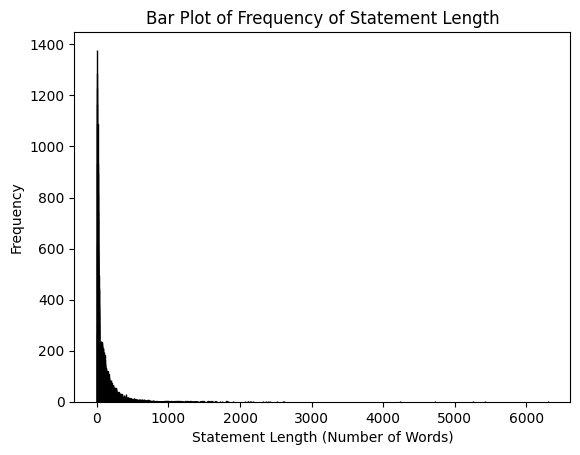

In [27]:
# Create a bar plot of the frequency of the 'statement_len' column
statement_len_counts = df1['statement_len'].value_counts()

plt.bar(statement_len_counts.index, statement_len_counts.values, edgecolor='black')
plt.xlabel('Statement Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Bar Plot of Frequency of Statement Length')
plt.show()

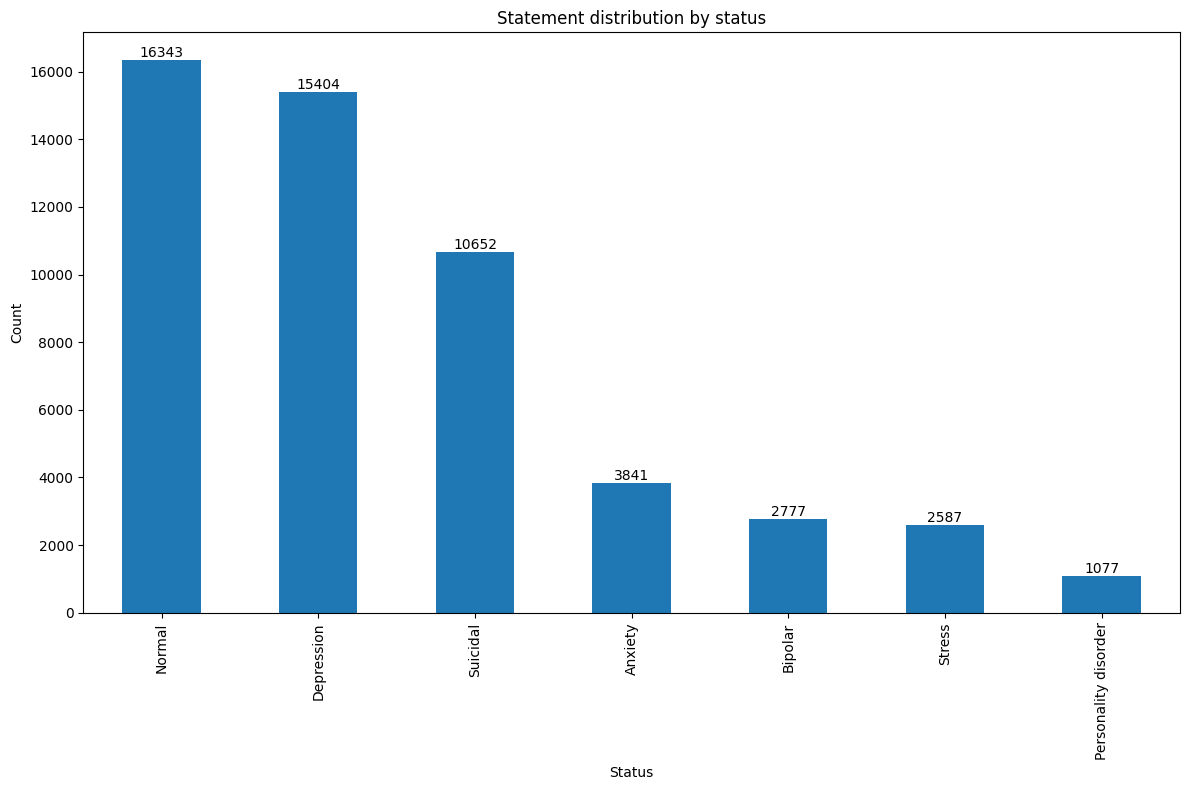

In [28]:
# Histogram of Frequency of Statements by Status
plt.figure(figsize=(12,8))

# get the unique status values and their counts
status_counts = df1['status'].value_counts()

# create the bar plot
ax = status_counts.plot(kind='bar')

# add the count labels on top of each bar
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Statement distribution by status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show() 

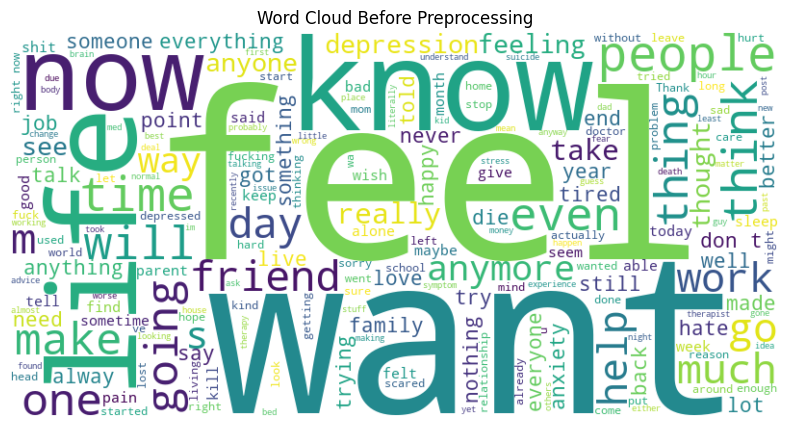

In [31]:
# Word Cloud Before Preprocessing
# Combine all statements into a single string
text = ' '.join(df1['statement'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()